In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
COST_PATH = "./bin/val_acc.data"
TRAIN_ACC_PATH = "./bin/train_acc.data"

file = open(COST_PATH,"r")
cost_data = file.read().split(" ")[:-1]
file.close()

file = open(TRAIN_ACC_PATH,"r")
train_acc_data = file.read().split(" ")[:-1]
file.close()

In [5]:
cost = np.array(cost_data).astype(np.float)
train_acc = np.array(train_acc_data).astype(np.float)

cost = cost.reshape((1,-1)).squeeze()
train_acc = train_acc.reshape((1,-1)).squeeze()

index = np.arange(100,3100,1)

cost_series = pd.Series(data=cost,index=index,name="cost")
train_acc_series = pd.Series(data=train_acc,index=index,name="train_acc")

In [6]:
df = pd.concat([cost_series,train_acc_series],axis=1).reset_index()

In [7]:
df = df.set_index(['index'])

In [8]:
df

,cost,train_acc
index,,
100,0.530000,0.530000
101,0.535000,0.530000
102,0.533333,0.535000
103,0.537500,0.536250
104,0.550000,0.538000
...,...,...
3095,0.479396,0.909406
3096,0.479389,0.909436
3097,0.479383,0.909466


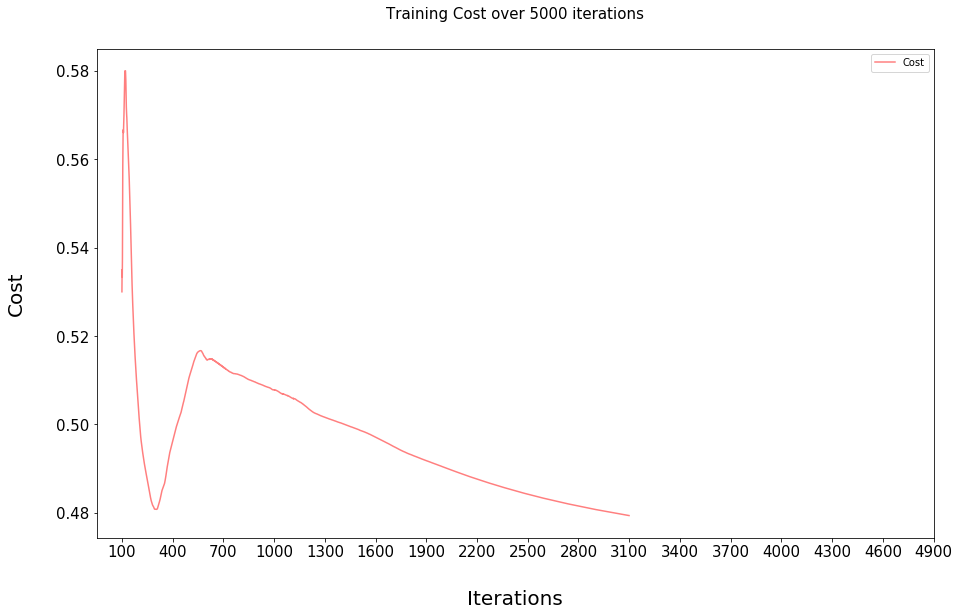

In [9]:
plt.figure(figsize=(15,9))
plt.plot(df["cost"],color="red",alpha=0.5,label="Cost")
plt.xlabel("Iterations",color="black",labelpad=30,fontsize=20)
plt.ylabel("Cost",color="black",labelpad=30,fontsize=20)
ticks = np.arange(100,5200,300)
plt.xticks(ticks=ticks,fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.title("Training Cost over 5000 iterations",pad=30,fontsize=15)
plt.savefig('cost.png', bbox_inches='tight')
plt.show()

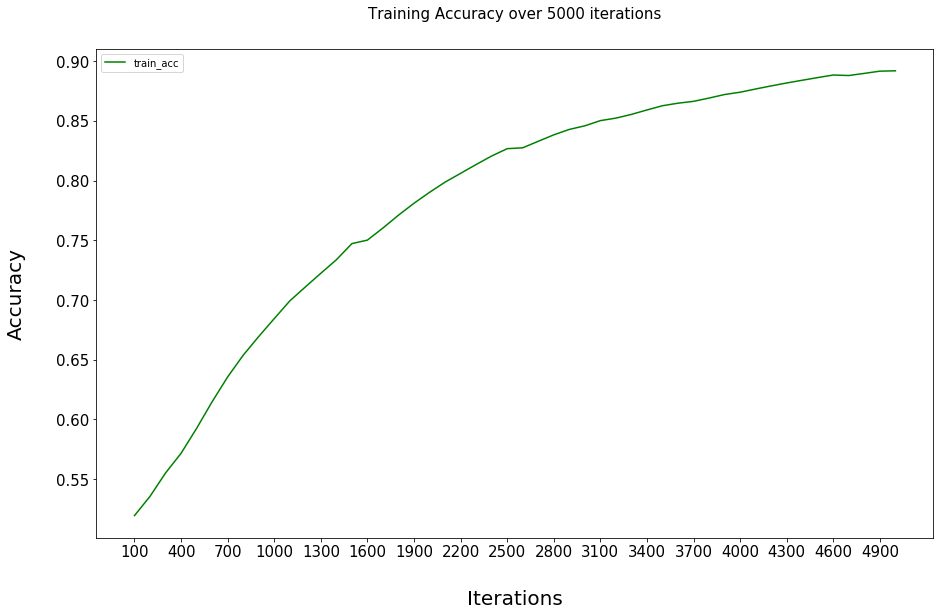

In [9]:
plt.figure(figsize=(15,9))
plt.plot(df["train_acc"],color="green",label="train_acc")
plt.xlabel("Iterations",color="black",labelpad=30,fontsize=20)
plt.ylabel("Accuracy",color="black",labelpad=30,fontsize=20)
ticks = np.arange(100,5200,300)
plt.xticks(ticks=ticks,fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.title("Training Accuracy over 5000 iterations",pad=30,fontsize=15)
plt.savefig('train_acc.png', bbox_inches='tight')
plt.show()